In [ ]:
# Restart the runtime
# import os
# os.kill(os.getpid(), 9)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline, AutoTokenizer
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import re
import torch
from datasets import Dataset
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk


In [ ]:
df = pd.read_excel('Training-Restated.xlsx')
df.head()

,Match ID 18Char,Completion Date,Match Support Contact Notes,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,2017-11-30,Question: Activities: Answer: See ms...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J0000028pRvQAI,2017-10-31,Question: Activities: Answer: See MS...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
2,a1v2J0000028pRvQAI,2017-12-01,Question: Activities: Answer: Match ...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
3,a1v2J0000028pRvQAI,2017-05-29,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
4,a1v2J0000028pRvQAI,2017-04-30,Question: Activities: Answer: Msc as...,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0


In [ ]:
df.describe()

,Completion Date,Big Age,Big Approved Date,Big Birthdate,Match Activation Date,Match Closure Meeting Date,Big Assessment Uploaded,Big Acceptance Date,Big Days Acceptance to Match,Big Days Interview to Acceptance,...,Little RTBM in Matchforce,Little Moved to RTBM in MF,Little Application Received,Little Interview Date,Little Acceptance Date,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
count,39198,39345.000000,35277,39345,39345,7362,14442,14442,7668.000000,14442.000000,...,14273.000000,14273.0,14273,14242,14258,39345,3.063100e+04,3.024300e+04,1.602000e+03,39345.000000
mean,2020-12-09 07:07:50.044390144,36.378828,2020-01-18 04:54:57.831448320,1988-03-25 22:42:42.134959936,2019-10-14 02:53:06.885245952,2020-05-17 22:27:05.427873024,2021-10-09 02:42:07.627752448,2021-11-21 09:03:06.954715648,144.016302,56.100679,...,0.023191,1.0,2021-05-30 20:23:41.537167872,2021-08-29 14:26:00.117960960,2021-10-04 00:45:39.009679104,2009-02-14 01:40:43.278688512,2.710549e+11,2.723587e+11,2.978464e+11,35.201388
min,2017-01-11 00:00:00,19.000000,2017-05-01 00:00:00,1944-04-01 00:00:00,2017-01-03 00:00:00,2017-05-01 00:00:00,2019-01-14 00:00:00,2019-02-20 00:00:00,-298.000000,0.000000,...,0.000000,1.0,2018-07-10 00:00:00,2018-08-22 00:00:00,2019-08-09 00:00:00,2000-09-01 00:00:00,2.700305e+11,6.037671e+10,5.001480e+10,0.000000
25%,2018-12-31 06:00:00,29.000000,2018-05-09 00:00:00,1984-08-01 00:00:00,2018-01-16 00:00:00,2018-10-23 06:00:00,2020-07-29 00:00:00,2020-08-26 00:00:00,37.000000,21.000000,...,0.000000,1.0,2020-03-09 00:00:00,2020-10-15 00:00:00,2020-11-04 00:00:00,2007-06-01 00:00:00,2.705302e+11,2.705302e+11,2.705302e+11,16.000000
50%,2020-09-23 00:00:00,33.000000,2019-08-16 00:00:00,1991-05-01 00:00:00,2019-05-14 00:00:00,2019-10-01 00:00:00,2021-06-21 00:00:00,2021-08-12 00:00:00,68.000000,32.000000,...,0.000000,1.0,2021-05-28 00:00:00,2021-07-31 12:00:00,2021-08-31 00:00:00,2008-12-01 00:00:00,2.705303e+11,2.705310e+11,2.705310e+11,29.700000
75%,2022-10-14 00:00:00,40.000000,2021-06-29 00:00:00,1995-07-01 00:00:00,2021-02-10 00:00:00,2021-08-22 00:00:00,2022-12-12 00:00:00,2023-02-13 00:00:00,154.000000,56.000000,...,0.000000,1.0,2022-06-06 00:00:00,2022-07-06 00:00:00,2022-08-22 00:00:00,2010-09-01 00:00:00,2.712303e+11,2.712303e+11,3.110900e+11,50.600000
max,2025-02-24 00:00:00,80.000000,2024-12-17 00:00:00,2005-04-01 00:00:00,2024-12-20 00:00:00,2025-02-06 00:00:00,2024-11-14 00:00:00,2025-01-09 00:00:00,1132.000000,1617.000000,...,1.000000,1.0,2024-11-07 00:00:00,2024-11-12 00:00:00,2024-11-12 00:00:00,2017-01-01 00:00:00,5.510912e+11,5.510912e+11,7.201330e+11,97.200000
std,NaN,10.996065,NaN,NaN,NaN,NaN,NaN,NaN,184.727275,107.437452,...,0.150514,0.0,NaN,NaN,NaN,NaN,9.605127e+09,2.769002e+10,1.070314e+11,23.385982


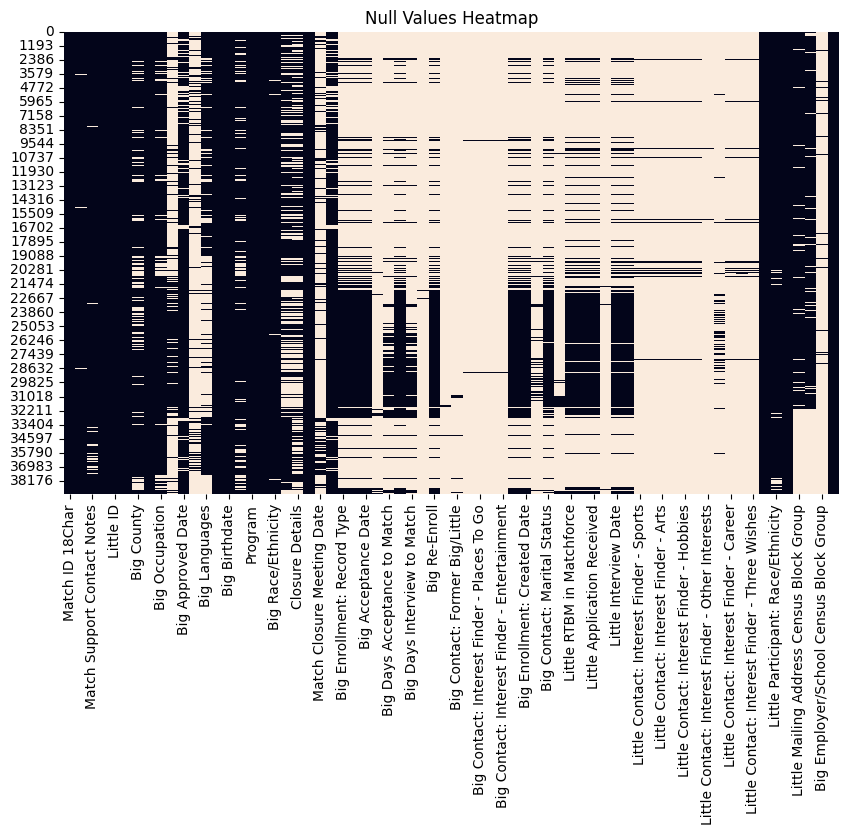

In [ ]:
# null values plot
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
# find count of unique matches
print(df['Match ID 18Char'].nunique())

3275


In [ ]:
# group matches with match id and plot for first match id
match_length_check = df.groupby('Match ID 18Char')['Match Length'].nunique()
inconsistent_matches = match_length_check[match_length_check > 1]

# Output the match IDs with inconsistent match lengths
print(inconsistent_matches)

Series([], Name: Match Length, dtype: int64)


Seemslike there are no any inconsitent matches (i.e. match length for each match_id entry is same, which is what we want).

In [ ]:
match_length =  df.groupby('Match ID 18Char').first().reset_index()[['Match ID 18Char', 'Match Length']]
match_length.head(10)

,Match ID 18Char,Match Length
0,a1v2J0000027CWYQA2,5.5
1,a1v2J0000027CWfQAM,8.5
2,a1v2J0000027CWiQAM,6.9
3,a1v2J0000027CWoQAM,7.2
4,a1v2J0000027CWpQAM,7.4
5,a1v2J0000027CWsQAM,6.2
6,a1v2J0000027CWuQAM,6.4
7,a1v2J0000027CWzQAM,7.8
8,a1v2J0000027CX1QAM,6.2
9,a1v2J0000027CX2QAM,6.5


In [ ]:
# mean match length value
print("Mean match length is:", float(match_length['Match Length'].mean()))

# mode of match length
print("Match length that appears most frequently is:", float(match_length['Match Length'].mode()))

#median
print("Median match length is:", float(match_length['Match Length'].median()))

Mean match length is: 23.38381679389313
Match length that appears most frequently is: 12.4
Median match length is: 16.8


In [ ]:
# match length frequency calculator
match_length_freq = match_length['Match Length'].value_counts().sort_values(ascending=False)
match_length_freq

,count
Match Length,
12.4,26
10.8,25
6.0,24
3.9,23
3.2,21
...,...
61.4,1
60.1,1
60.3,1


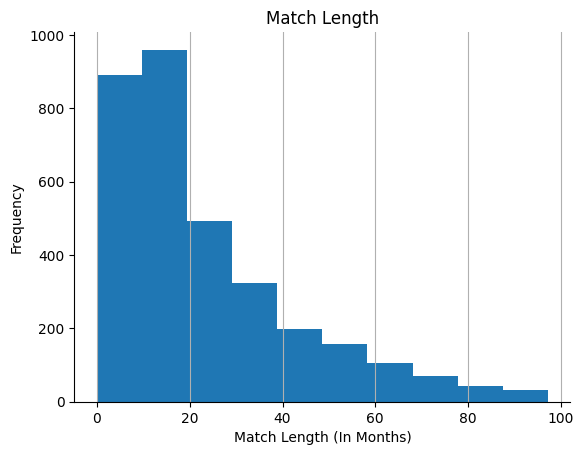

In [ ]:
# @title Match Length
match_length['Match Length'].plot(kind='hist', bins=10, title='Match Length').grid(axis='x')
plt.xlabel('Match Length (In Months)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

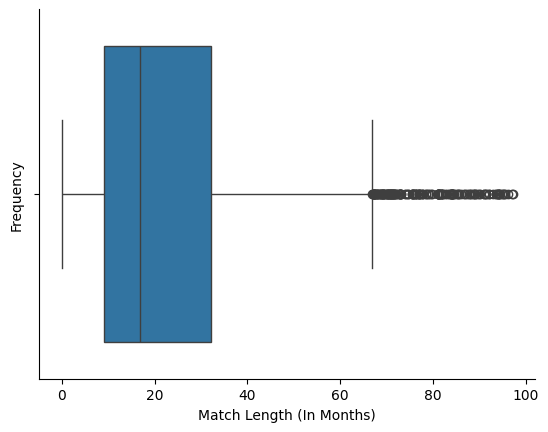

In [ ]:
# box plot match length freq
sns.boxplot(x=match_length['Match Length'])
plt.xlabel('Match Length (In Months)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

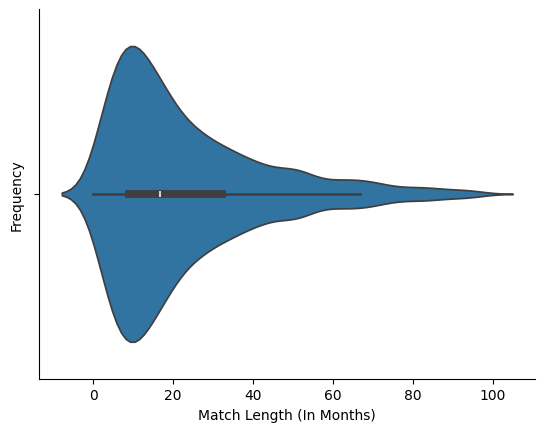

In [ ]:
# violin plot
sns.violinplot(x=match_length['Match Length'])
plt.xlabel('Match Length (In Months)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

All the matches more than 60 months seems to be an outlier. These matches can be point of our interest. What made these matches go for such a long time?

In [ ]:
matches_60_months = df[df['Match Length'] > 60]

In [ ]:
print("Number of matches that's more than 60 months in training set is")
matches_60_months['Match ID 18Char'].nunique()

Number of matches that's more than 60 months in training set is


237

NLP for Match Support Contact Notes

In [ ]:
match_support_df = df[['Match ID 18Char','Completion Date', 'Match Support Contact Notes']]

match_support_df.head()

,Match ID 18Char,Completion Date,Match Support Contact Notes
0,a1v2J0000028pRvQAI,2017-11-30,Question: Activities: Answer: See ms...
1,a1v2J0000028pRvQAI,2017-10-31,Question: Activities: Answer: See MS...
2,a1v2J0000028pRvQAI,2017-12-01,Question: Activities: Answer: Match ...
3,a1v2J0000028pRvQAI,2017-05-29,Question: Activities: Answer: Msc as...
4,a1v2J0000028pRvQAI,2017-04-30,Question: Activities: Answer: Msc as...


Let's have a look at contact notes of match with max length

In [ ]:
# match_id of match with max length
match_length = match_length.sort_values(by='Match Length', ascending=False)
match_length.head()

,Match ID 18Char,Match Length
833,a1v2J0000028HAZQA2,97.2
1311,a1v2J000002AFZnQAO,97.1
870,a1v2J0000028Lj5QAE,96.2
349,a1v2J0000027UpqQAE,95.6
552,a1v2J0000027uB3QAI,95.3


In [ ]:
# get match_id of a1v2J0000028HAZQA2 , match with longest length
test_match = match_support_df[match_support_df['Match ID 18Char'] == 'a1v2J0000028HAZQA2']

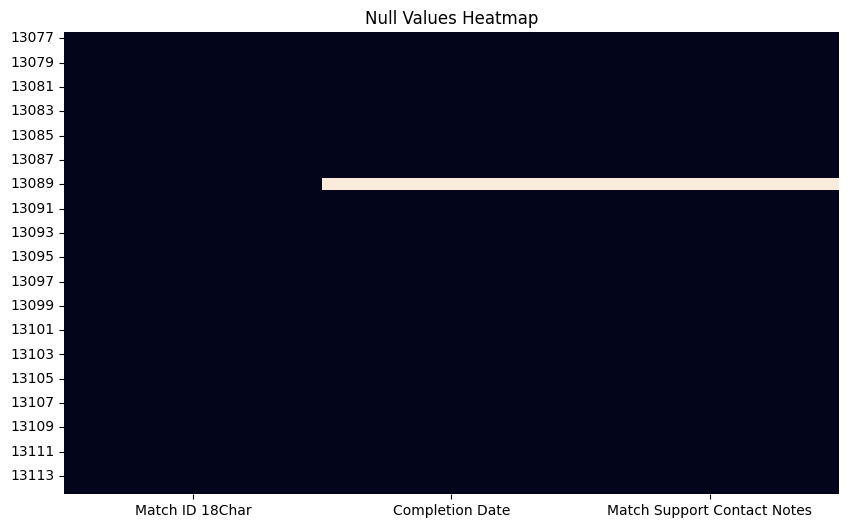

In [ ]:
# plot null value map
plt.figure(figsize=(10, 6))
sns.heatmap(test_match.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
# remove null values
test_match = test_match.dropna()
test_match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 13077 to 13114
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Match ID 18Char              37 non-null     object        
 1   Completion Date              37 non-null     datetime64[ns]
 2   Match Support Contact Notes  37 non-null     object        
 3   Refined MSC Notes            37 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.4+ KB


In [ ]:
sample_text = test_match['Match Support Contact Notes'].sample(1).values
pprint(sample_text)

array(["Question: Activities:           Answer: See mss notes. Question: Child Safety:           Answer: . Question: Child Development:           Answer: . Question: Child/Volunteer Relationship development:           Answer: . Question: Relationship with BBBS:           Answer: . Question: Parent/Volunteer Concerns:           Answer: . Question: Other Comments-List progress/activities in school and in JJ System:           Answer: . Question: MSS Notes:           Answer: 2017 BBBS Winter Picnic at the Holidazzle Village Little?s Full Name: ______L_first_name_L_last_name____________________ Big?s Full Name: ____B_first_name B_last_name_________________________ Match Engagement Coordinator:__Mai________________________ Please answer the following questions together: What were two of your favorite memories this year? LITTLE: 1. Skyzone 2. Science Museum BIG: 1. Cabin 2. Skating LITTLE: List 1-2 things you would like to do with your Big in 2018: 1. Hockey 2. Baseball BIG & LITTLE: Which wo

Here, we can see the data is in Question Answer format. Most of questions have no answer. So it is best to remove that text as it do not contribute anything to the data.

In [ ]:
def extract_non_blank_answers(text):
    # Regular expression to extract Question-Answer pairs
    pattern = r'Question:\s*(.*?)\s*Answer:\s*(.*?)\s*(?=Question:|$)'
    matches = re.findall(pattern, text, re.DOTALL)

    if matches:
      # Filter out where Answer is just a single character or blank ('.' or ' ')
      # non_blank_pairs = [(question, answer) for question, answer in matches if len(answer.strip()) > 1]
      return_string = ''.join([f"{question}{answer}" for question, answer in matches if len(answer.strip())> 1])
    else:
      return_string = text

    # Remove extra whitespace and newlines
    return_string = re.sub(r'\s+', ' ', return_string).strip()

    #Remove unnecessary underscores
    return_string = re.sub(r'_+', '', return_string)

    return return_string

test_match['Refined MSC Notes'] = test_match['Match Support Contact Notes'].apply(extract_non_blank_answers)

In [ ]:
cleaned_sample_note= test_match['Refined MSC Notes'].sample(1).values
print(cleaned_sample_note)

['Activities:See MSS notesMSS Notes:Msc checked on match. BB reported that they haven\'t seen each other in about 6 weeks due to Lb not feeling well. BB shared that mom told him that Lb is experiencing some "serious health issue" where Lb is missing school and hasn\'t been able to go on match activity with BB. BB also added that he is in touch with mom via text on a weekly basis to see how Lb is doing. BB also dropped off a card for Lb. Overall, match is doing fine. They will resume with activity when Lb gets well. Msc is glad to hear that BB cares and checks in on how Lb is doing. No concerns. continue call.']


Since MSC notes are too long for BERT to be used for sentiment analysis, I think we have to use some sort of summerization model before going forward with sentiment analysis.
EDit: Since summerization causes information loss, I'll truncate long texts and get avg sentiment from those texts instead.

In [ ]:
# summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
# # summarizer = pipeline("text2text-generation", model="mrm8488/t5-base-finetuned-common_gen")

# # Load pre-trained BERT model for sentiment analysis
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Define a function to truncate long texts
# def truncate_text(text, max_tokens=512):
#     """Truncates text to a maximum number of tokens."""
#     words = text.split()
#     if len(words) > max_tokens:
#         return ' '.join(words[:max_tokens])
#     return text


In [ ]:
# print(truncate_text(cleaned_sample_note[0]))

Activities:See MSS notesMSS Notes:Msc checked on match. BB reported that they haven't seen each other in about 6 weeks due to Lb not feeling well. BB shared that mom told him that Lb is experiencing some "serious health issue" where Lb is missing school and hasn't been able to go on match activity with BB. BB also added that he is in touch with mom via text on a weekly basis to see how Lb is doing. BB also dropped off a card for Lb. Overall, match is doing fine. They will resume with activity when Lb gets well. Msc is glad to hear that BB cares and checks in on how Lb is doing. No concerns. continue call.


In [ ]:
# text = test_match['Refined MSC Notes'].sample(1).values[0]

# text = truncate_text(text)
# print(text, '\n')

# if len(text.split()) > 200:
#   summary = summarizer(text, max_length=300, min_length=200, do_sample=False)
#   summary_text = summary[0]['summary_text']
# else:
#   summary_text = text

# print(summary_text)

Big completed Registration for 7/16/2022 BBBS Summer Picnic event: First name: Bfirstname Last Name: Blastname Email: emailaddress Cell phone: phonenumber Do you and your Little ever talk about your cultural differences? Describe the difference(s) and what you talk about related to it. No Describe how you and your Little interact at the beginning of each outing. How do these actions/habits/questions help set the tone for your time together? What is something that you have recently learned about your Little and their personality, life, culture, or perspective? Learned about celebrations in Mexico Completion of this registration can count as your check-in for this month. Would you like your Match Engagement Coordinator to contact you to discuss anything further? If so, please provide a brief description. Nope, good to go! What are some telltale signs that your Little is feeling a certain way or has something on their mind? MEC email response 6/6/22; ? Hi Bfirstname- Thanks so much for re

In [ ]:

# Example text data (replace with your own data)
# text_data = [
#     "I love this match, it was amazing!",
#     "This match was terrible and boring.",
#     "The match was okay, nothing special."
# ]

# Perform sentiment analysis
text = truncate_text(cleaned_sample_note[0])
sentiment_results = sentiment_analyzer(text)
# Print the results
for result in sentiment_results:
    print(f"Text: {text} \nSentiment: {result['label']}, Score: {result['score']}\n")

Text: Activities:See MSS notesMSS Notes:Msc checked on match. BB reported that they haven't seen each other in about 6 weeks due to Lb not feeling well. BB shared that mom told him that Lb is experiencing some "serious health issue" where Lb is missing school and hasn't been able to go on match activity with BB. BB also added that he is in touch with mom via text on a weekly basis to see how Lb is doing. BB also dropped off a card for Lb. Overall, match is doing fine. They will resume with activity when Lb gets well. Msc is glad to hear that BB cares and checks in on how Lb is doing. No concerns. continue call. 
Sentiment: 4 stars, Score: 0.4197973906993866



In [ ]:

# # Download NLTK resources (first time only)
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('punkt')

# Preprocessing
def preprocess(text):
    words = [word for word in word_tokenize(text.lower())
             if word not in stopwords.words('english')
             and word not in string.punctuation
             and len(word) > 2]  # Minimum length
    return ' '.join(words) if words else '[NO_CONTENT]'

"""
  Extracts top n keywords from input text using TF-IDF.

  Args:
      text (str): Input text to analyze.
      n (int): Number of top keywords to return (default=10).

  Returns:
      list: Top n keywords with highest TF-IDF scores.
    """
def get_top_keywords(text, n=15):
    processed_text = preprocess(text)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([processed_text])
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.toarray()[0]
    return [feature_names[i] for i in scores.argsort()[::-1][:n]]

# Example usage

print(get_top_keywords(cleaned_sample_note[0]))

['match', 'see', 'msc', 'mom', 'well', 'activity', 'also', 'shared', 'told', 'touch', 'weeks', 'via', 'weekly', 'resume', 'school']


Now, let's implement this in the test_match dataset.

In [ ]:
# def summerizer_sentiment_analyzer(text):
#   if len(text.split()) > 200:
#     summary = summarizer(text, max_length=300, min_length=200, do_sample=False)
#     summary_text = summary[0]['summary_text']
#   else:
#     summary_text = text
#   sentiment_results = sentiment_analyzer(summary_text)

#   return summary_text, f"{sentiment_results[0]['label']}"

# test_match['Summary'], test_match['Sentiment'] = test_match['Match Support Contact Notes'].apply(summerizer_sentiment_analyzer)

# test_match.head()


In [ ]:

# Initialize with your actual model name
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analyzer = pipeline("sentiment-analysis",
                             model=model_name,
                             tokenizer=tokenizer,
                             device=0 if torch.cuda.is_available() else -1)

def truncate_text(text, max_length=512):
    """Ensure text is within model's token limit"""
    inputs = tokenizer(text, truncation=True, max_length=max_length, return_tensors="pt")
    return tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True)

def process_batch(batch, batch_size=8):
    """Process texts in batches with proper truncation"""
    results = []
    for i in range(0, len(batch), batch_size):

      batch_df = batch.iloc[i:i+batch_size]
      batch_texts = batch_df['Refined MSC Notes'].tolist()

      # Truncate and analyze
      truncated_texts = [truncate_text(text) for text in batch_texts]
      sentiments = sentiment_analyzer(truncated_texts)

      # Get keywords
      keywords = [get_top_keywords(text) for text in truncated_texts]

      for idx, (_, row) in enumerate(batch_df.iterrows()):
        results.append({
            'Match_ID': row['Match ID 18Char'],
            'Completion_Date': row['Completion Date'],
            # Add other desired fields here
            'Cleaned_MSC_Notes': row['Refined MSC Notes'],
            'Truncated_text': truncated_texts[idx],
            'Sentiment': sentiments[idx]['label'],
            'Sentiment_score': sentiments[idx]['score'],
            'Keywords': keywords[idx]
        })

    return pd.DataFrame(results)


Device set to use cuda:0


              Match_ID Sentiment  \
0   a1v2J0000028HAZQA2   5 stars   
1   a1v2J0000028HAZQA2   4 stars   
2   a1v2J0000028HAZQA2   4 stars   
3   a1v2J0000028HAZQA2   5 stars   
4   a1v2J0000028HAZQA2   4 stars   
5   a1v2J0000028HAZQA2   4 stars   
6   a1v2J0000028HAZQA2   4 stars   
7   a1v2J0000028HAZQA2   4 stars   
8   a1v2J0000028HAZQA2   4 stars   
9   a1v2J0000028HAZQA2   5 stars   
10  a1v2J0000028HAZQA2   2 stars   
11  a1v2J0000028HAZQA2   4 stars   
12  a1v2J0000028HAZQA2   4 stars   
13  a1v2J0000028HAZQA2   4 stars   
14  a1v2J0000028HAZQA2   2 stars   
15  a1v2J0000028HAZQA2   4 stars   
16  a1v2J0000028HAZQA2   4 stars   
17  a1v2J0000028HAZQA2   2 stars   
18  a1v2J0000028HAZQA2   5 stars   
19  a1v2J0000028HAZQA2   3 stars   
20  a1v2J0000028HAZQA2   4 stars   
21  a1v2J0000028HAZQA2   4 stars   
22  a1v2J0000028HAZQA2   3 stars   
23  a1v2J0000028HAZQA2   4 stars   
24  a1v2J0000028HAZQA2   2 stars   
25  a1v2J0000028HAZQA2   2 stars   
26  a1v2J0000028HAZQA2   4 s

In [ ]:

# Usage
test_df = process_batch(test_match)
print(test_df[['Match_ID', 'Sentiment', 'Keywords']])

              Match_ID Sentiment  \
0   a1v2J0000028HAZQA2   5 stars   
1   a1v2J0000028HAZQA2   4 stars   
2   a1v2J0000028HAZQA2   4 stars   
3   a1v2J0000028HAZQA2   5 stars   
4   a1v2J0000028HAZQA2   4 stars   
5   a1v2J0000028HAZQA2   4 stars   
6   a1v2J0000028HAZQA2   4 stars   
7   a1v2J0000028HAZQA2   4 stars   
8   a1v2J0000028HAZQA2   4 stars   
9   a1v2J0000028HAZQA2   5 stars   
10  a1v2J0000028HAZQA2   2 stars   
11  a1v2J0000028HAZQA2   4 stars   
12  a1v2J0000028HAZQA2   4 stars   
13  a1v2J0000028HAZQA2   4 stars   
14  a1v2J0000028HAZQA2   2 stars   
15  a1v2J0000028HAZQA2   4 stars   
16  a1v2J0000028HAZQA2   4 stars   
17  a1v2J0000028HAZQA2   2 stars   
18  a1v2J0000028HAZQA2   5 stars   
19  a1v2J0000028HAZQA2   3 stars   
20  a1v2J0000028HAZQA2   4 stars   
21  a1v2J0000028HAZQA2   4 stars   
22  a1v2J0000028HAZQA2   3 stars   
23  a1v2J0000028HAZQA2   4 stars   
24  a1v2J0000028HAZQA2   2 stars   
25  a1v2J0000028HAZQA2   2 stars   
26  a1v2J0000028HAZQA2   4 s

In [ ]:
test_df.head()

,Match_ID,Completion_Date,Cleaned_MSC_Notes,Truncated_text,Sentiment,Sentiment_score,Keywords
0,a1v2J0000028HAZQA2,2025-01-29,MEC has been email anmd texting Big for a few ...,mec has been email anmd texting big for a few ...,5 stars,0.473659,"[big, good, thought, survey, sorry, sent, nove..."
1,a1v2J0000028HAZQA2,2024-05-31,Approximately how many times has your match go...,approximately how many times has your match go...,4 stars,0.316759,"[match, like, together, something, activities,..."
2,a1v2J0000028HAZQA2,2023-11-09,Match is on color coded- GREEN. MEC Mai sent a...,match is on color coded - green. mec mai sent ...,4 stars,0.385329,"[match, well, day, last, resource, report, sti..."
3,a1v2J0000028HAZQA2,2023-10-23,MEC and BB connected over the phone. He said s...,mec and bb connected over the phone. he said s...,5 stars,0.267762,"[mec, bb, also, mentioned, said, page, reach, ..."
4,a1v2J0000028HAZQA2,2023-05-15,Registration form: Order Date 2023-05-11 5:39:...,registration form : order date 2023 - 05 - 11 ...,4 stars,0.240253,"[match, together, last, text, game, get, like,..."


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Match_ID           37 non-null     object        
 1   Completion_Date    37 non-null     datetime64[ns]
 2   Cleaned_MSC_Notes  37 non-null     object        
 3   Truncated_text     37 non-null     object        
 4   Sentiment          37 non-null     object        
 5   Sentiment_score    37 non-null     float64       
 6   Keywords           37 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.2+ KB


Analysing sentiment of whole dataset and extracting keywords


ToDOs:
1) Find most frequently used words in successful and unsuccessful matches using probably word cloud
2) Do the key words, phrases, or sentiments differ between the early stages and late stages of a match?
3)

In [ ]:
def extract_non_blank_answers(text):
    # Regular expression to extract Question-Answer pairs
    pattern = r'Question:\s*(.*?)\s*Answer:\s*(.*?)\s*(?=Question:|$)'
    matches = re.findall(pattern, text, re.DOTALL)

    if matches:
      # Filter out where Answer is just a single character or blank ('.' or ' ')
      # non_blank_pairs = [(question, answer) for question, answer in matches if len(answer.strip()) > 1]
      return_string = ''.join([f"{question}{answer}" for question, answer in matches if len(answer.strip())> 1])
    else:
      return_string = text

    # Remove extra whitespace and newlines
    return_string = re.sub(r'\s+', ' ', return_string).strip()

    #Remove unnecessary underscores
    return_string = re.sub(r'_+', '', return_string)

    return return_string

# Preprocessing
def preprocess(text):
    words = [word for word in word_tokenize(text.lower())
             if word not in stopwords.words('english')
             and word not in string.punctuation
             and len(word) > 2]  # Minimum length
    return ' '.join(words) if words else '[NO_CONTENT]'

"""
  Extracts top n keywords from input text using TF-IDF.

  Args:
      text (str): Input text to analyze.
      n (int): Number of top keywords to return (default=10).

  Returns:
      list: Top n keywords with highest TF-IDF scores.
    """
def get_top_keywords(text, n=15):
    processed_text = preprocess(text)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([processed_text])
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.toarray()[0]
    return [feature_names[i] for i in scores.argsort()[::-1][:n]]


def truncate_text(text, max_length=512):
    """Ensure text is within model's token limit"""
    inputs = tokenizer(text, truncation=True, max_length=max_length, return_tensors="pt")
    return tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True)

def process_batch(batch, batch_size=8):
    """Process texts in batches with proper truncation"""
    results = []
    for i in range(0, len(batch), batch_size):

      batch_df = batch.iloc[i:i+batch_size]
      batch_texts = batch_df['Refined MSC Notes'].tolist()

      # Truncate and analyze
      truncated_texts = [truncate_text(text) for text in batch_texts]
      sentiments = sentiment_analyzer(truncated_texts)

      # Get keywords
      keywords = [get_top_keywords(text) for text in truncated_texts]

      for idx, (_, row) in enumerate(batch_df.iterrows()):
        results.append({
            'Match_ID': row['Match ID 18Char'],
            'Completion_Date': row['Completion Date'],
            # Add other desired fields here
            'Cleaned_MSC_Notes': row['Refined MSC Notes'],
            'Truncated_text': truncated_texts[idx],
            'Sentiment': sentiments[idx]['label'],
            'Sentiment_score': sentiments[idx]['score'],
            'Keywords': keywords[idx]
        })

    return pd.DataFrame(results)


columns = ['Match Support Contact Notes', 'Completion Date']
df = df.dropna(subset=columns)
df['Refined MSC Notes'] = df['Match Support Contact Notes'].apply(extract_non_blank_answers)

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analyzer = pipeline("sentiment-analysis",
                             model=model_name,
                             tokenizer=tokenizer,
                             device=0 if torch.cuda.is_available() else -1)

result_df = process_batch(df)
result_df.head()

,Match_ID,Completion_Date,Cleaned_MSC_Notes,Truncated_text,Sentiment,Sentiment_score,Keywords
0,a1v2J0000028pRvQAI,2017-11-30,Activities:See mss notes.MSS Notes:Match Closi...,activities : see mss notes. mss notes : match ...,3 stars,0.264403,"[match, contact, thanks, closing, little, big,..."
1,a1v2J0000028pRvQAI,2017-10-31,Activities:See MSS notes.MSS Notes:See Comm lo...,activities : see mss notes. mss notes : see co...,1 star,0.269655,"[match, notes, see, msc, mss, closing, trimest..."
2,a1v2J0000028pRvQAI,2017-12-01,Activities:Match Closed.MSS Notes:Match Closed.,activities : match closed. mss notes : match c...,1 star,0.456609,"[match, closed, notes, mss, activities]"
3,a1v2J0000028pRvQAI,2017-05-29,Activities:Msc asked about activities. Bs said...,activities : msc asked about activities. bs sa...,4 stars,0.369690,"[msc, match, plan, suggested, concerns, activi..."
4,a1v2J0000028pRvQAI,2017-04-30,Activities:Msc asked about activities. Bs said...,activities : msc asked about activities. bs sa...,4 stars,0.329837,"[said, asked, msc, match, activities, relation..."
